<a href="https://colab.research.google.com/github/ramdarsh/Excelr_assignments/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

50 STARTUPS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

In [2]:
data = pd.read_csv("/content/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data=pd.get_dummies(data,["State"])
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [8]:
data=data.drop("State_New York",axis=1)
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


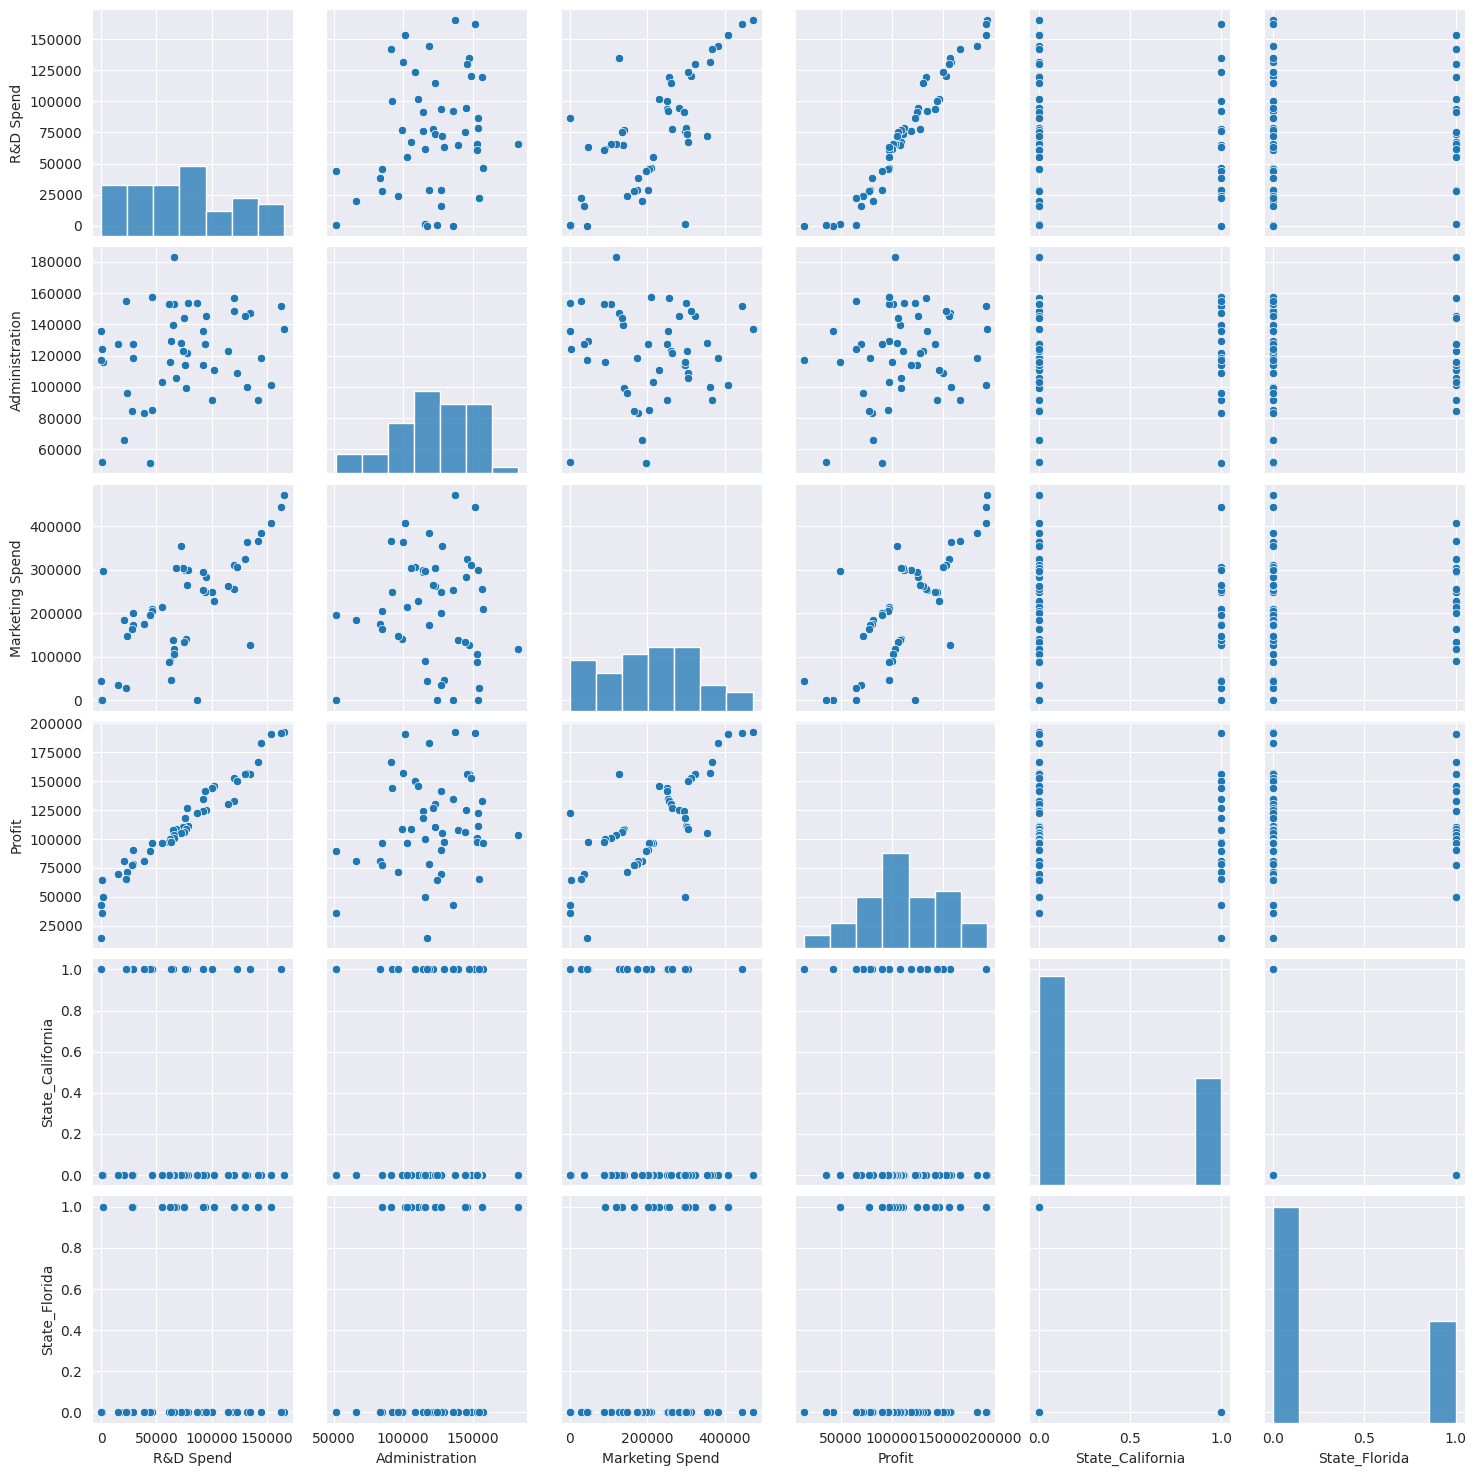

In [9]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [10]:
Y=data.iloc[:,3]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [11]:
X = data.iloc[ : , data.columns !="Profit"]
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [12]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [13]:
data.rename({"R&D Spend":"RD","Administration":"Admin","Marketing Spend":"Marketing","State_California":"California","State_Florida":"florida"},axis=1,inplace=True)
data.head(5)

,RD,Admin,Marketing,Profit,California,florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [14]:
model1=smf.ols("Profit~RD+Admin+Marketing+California+florida",data=data).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        14:16:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RD             0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing      0.0270      0.017      1.574      0.123      -0.008       0.062
California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model1.rsquared

0.9507524843355148

In [17]:
vif1=smf.ols('RD~Admin+Marketing+California+florida',data=data).fit().rsquared


In [18]:
vif_rd=1/(1-vif1)
vif_rd

2.4955109215494433

In [19]:
vif2=smf.ols('Admin~RD+Marketing+California+florida',data=data).fit().rsquared


In [20]:
vif_admin=1/(1-vif2)
vif_admin

1.1777660508993844

In [21]:
vif3=smf.ols('Marketing~RD+Admin+California+florida',data=data).fit().rsquared


In [22]:
vif_marketing=1/(1-vif3)
vif_marketing

2.4167967566863933

In [23]:
vif4=smf.ols('California~RD+Admin+Marketing+florida',data=data).fit().rsquared


In [24]:
vif_california=1/(1-vif4)
vif_california

1.3350608769628542

In [25]:
vif5=smf.ols('florida~RD+Admin+Marketing+California',data=data).fit().rsquared


In [26]:
vif_florida=1/(1-vif5)
vif_florida

1.3612992664384325

In [27]:
vifvalues=pd.DataFrame({"variables":['RD','Admin','Marketing','California','florida'],"vif":[2.49,1.17,2.41,1.33,1.36]})
vifvalues

,variables,vif
0,RD,2.49
1,Admin,1.17
2,Marketing,2.41
3,California,1.33
4,florida,1.36


In [28]:
model1.resid

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782788
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

In [29]:
model1.fittedvalues

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


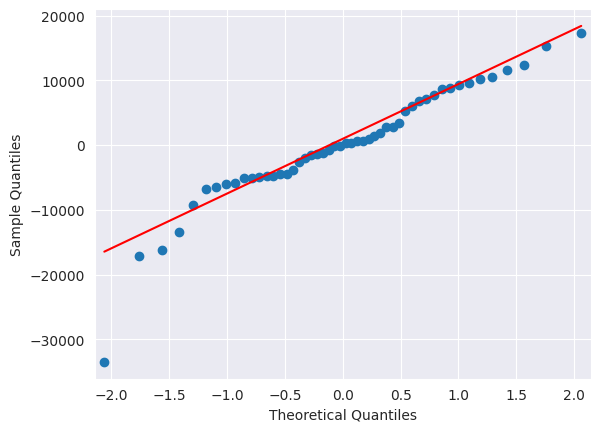

In [30]:
qqplot=sm.qqplot(model1.resid,line="q")
plt.title=("Q-Q plot of residuals")

<Axes: >

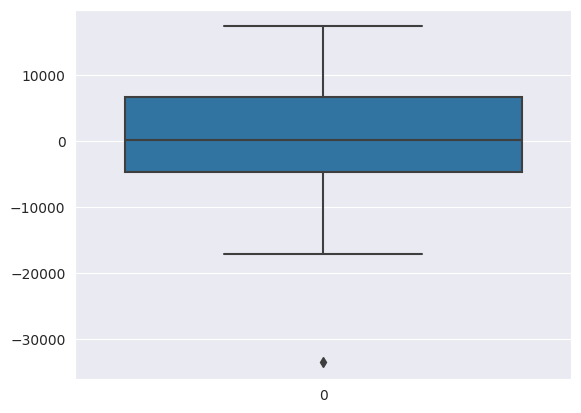

In [31]:
sns.boxplot(model1.resid)

In [32]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0     2.045180
1     1.960723
2     1.787824
3     1.566680
4     1.533402
5     1.309406
6     1.172654
7     1.224977
8     1.008166
9     1.089460
10    0.601814
11    0.598353
12    0.439434
13    0.392319
14    0.958795
15    0.868448
16    0.123188
17    0.459853
18    0.436045
19    0.091131
20    0.115979
21    0.132028
22    0.071771
23   -0.048061
24    0.032613
25   -0.249671
26   -0.031738
27    0.057687
28   -0.259383
29   -0.261865
30   -0.315096
31   -0.366283
32   -0.331400
33   -0.354984
34   -0.586190
35   -0.549415
36   -0.931004
37   -0.570847
38   -1.079004
39   -0.720784
40   -0.947806
41   -0.942881
42   -1.054336
43   -1.320886
44   -1.206771
45   -1.639246
46   -1.418270
47   -1.667747
48   -1.600196
49   -1.624064
dtype: float64
0    -0.014393
1     0.304175
2     0.980943
3     1.041629
4    -0.680763
5    -0.724755
6    -0.221001
7    -0.492254
8     0.064511
9    -0.566785
10    1.169112
11    0.976091
12    1.375413
13    0.768738
14   -1.910831
15   -1.81

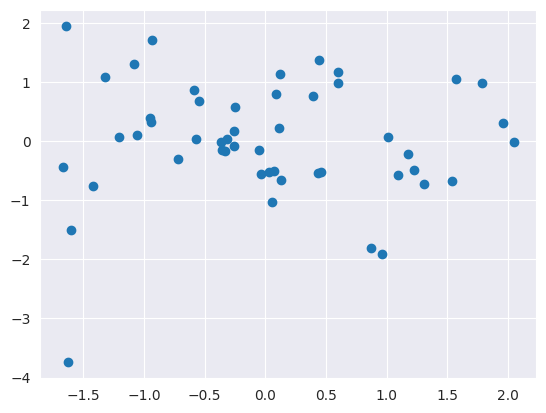

In [33]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
print(get_standardized_values(model1.fittedvalues))
print(get_standardized_values(model1.resid))
plt.xlabel=("standardized fitted values")
plt.ylabel=("standard residuals")
plt.show()

In [34]:
data.head(5)

,RD,Admin,Marketing,Profit,California,florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


eval_env: 1


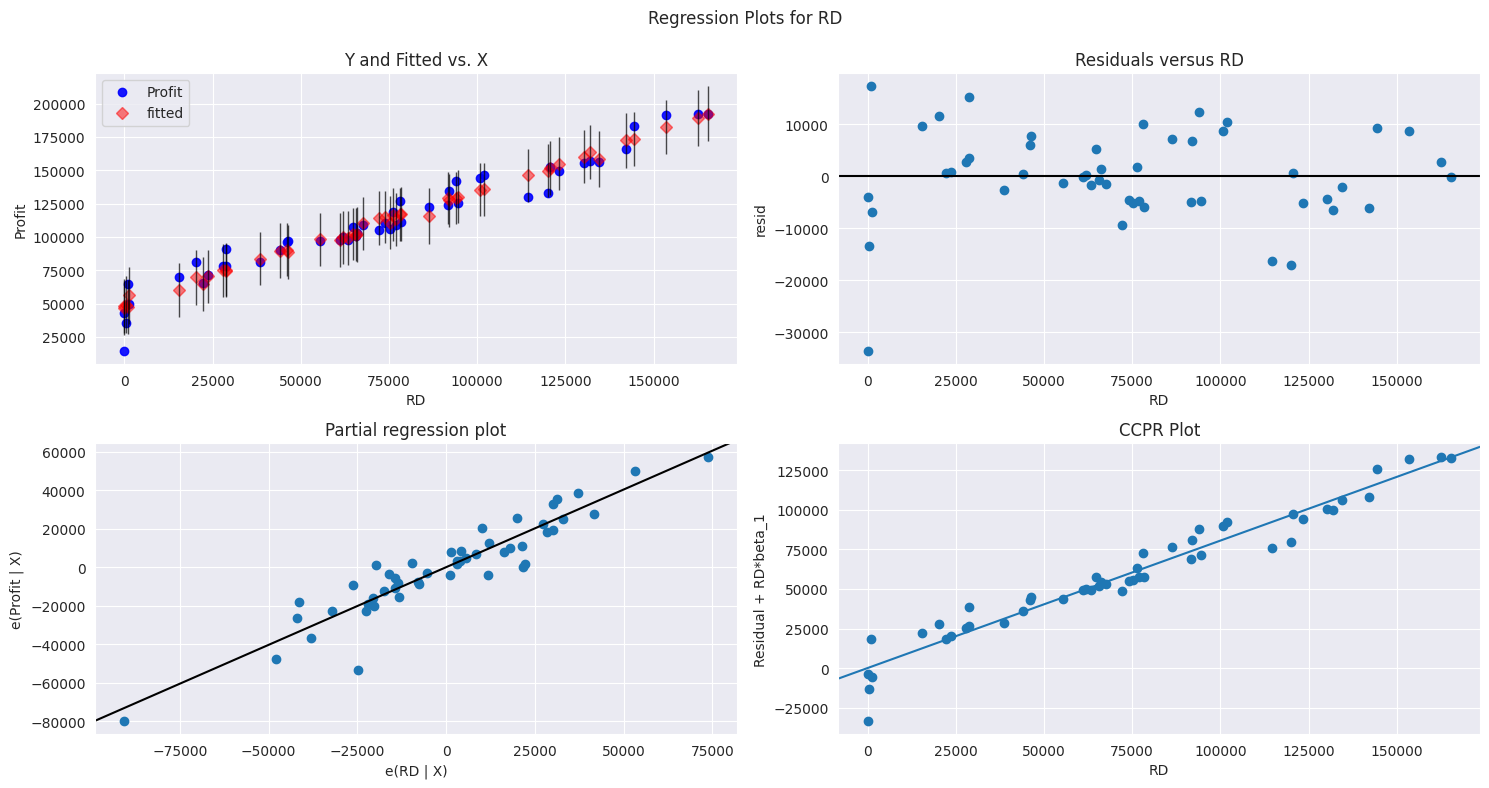

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"RD",fig=fig)
plt.show()

eval_env: 1


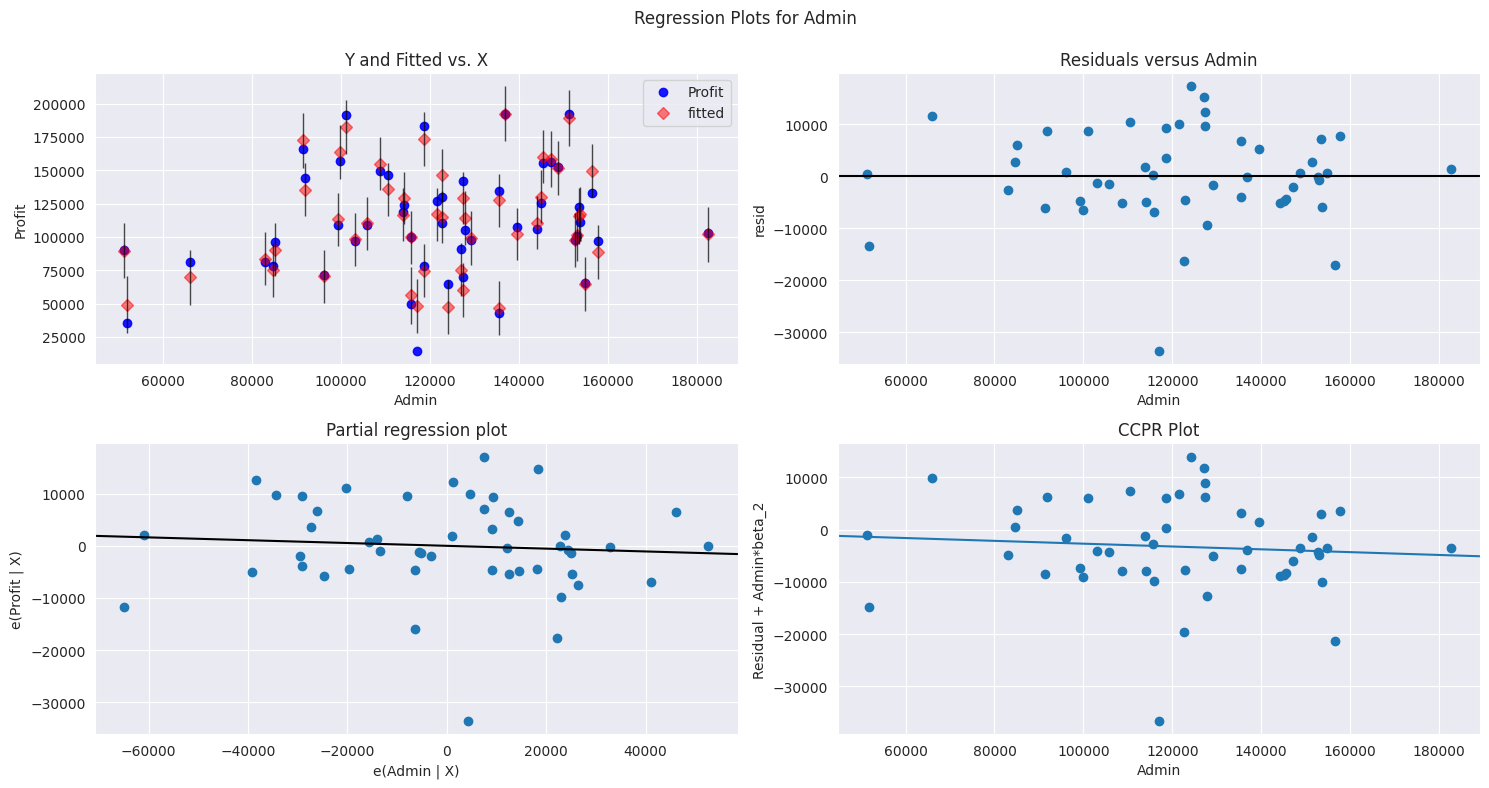

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'Admin',fig=fig)
plt.show()

eval_env: 1


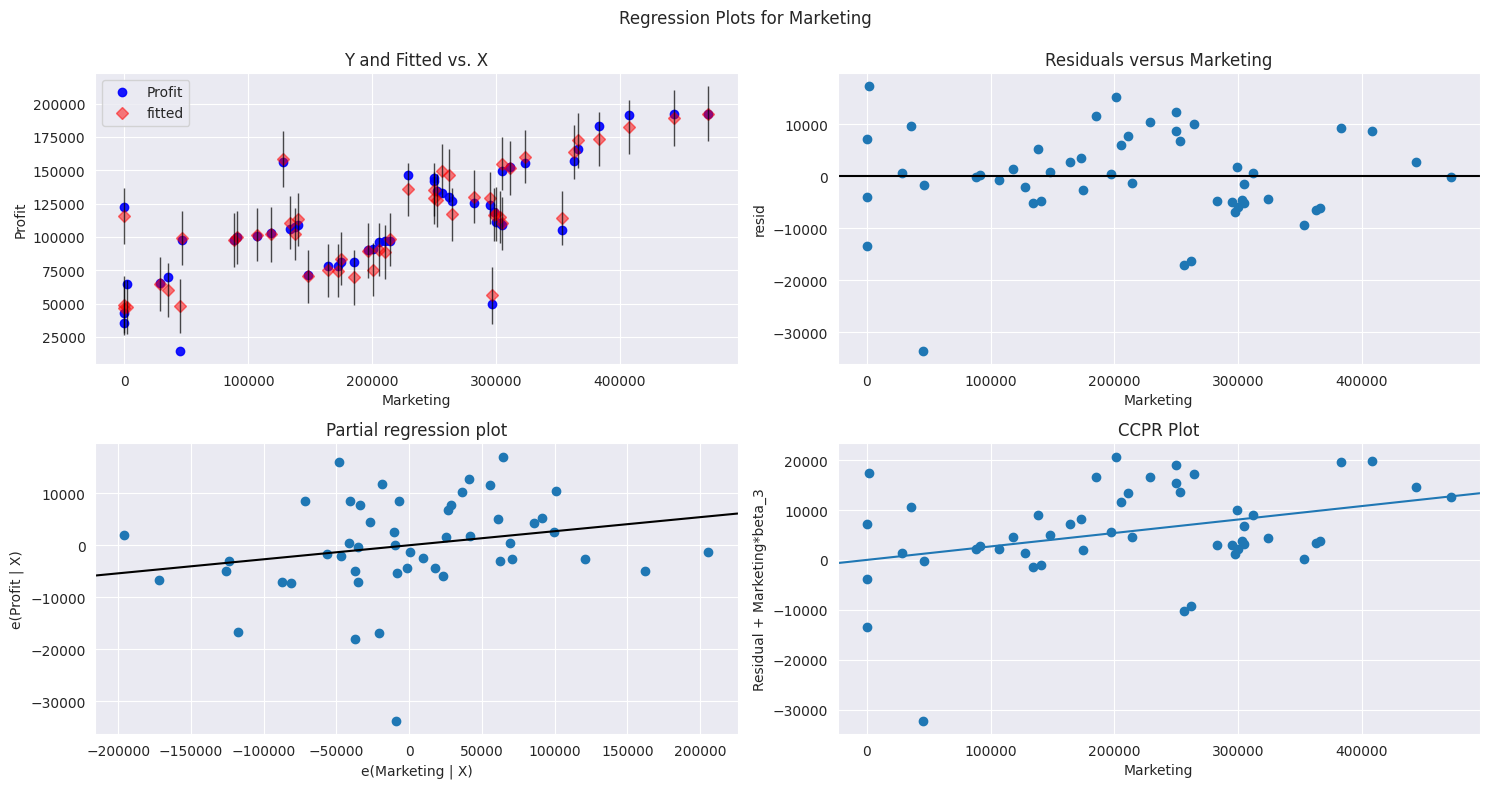

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'Marketing',fig=fig)
plt.show()

eval_env: 1


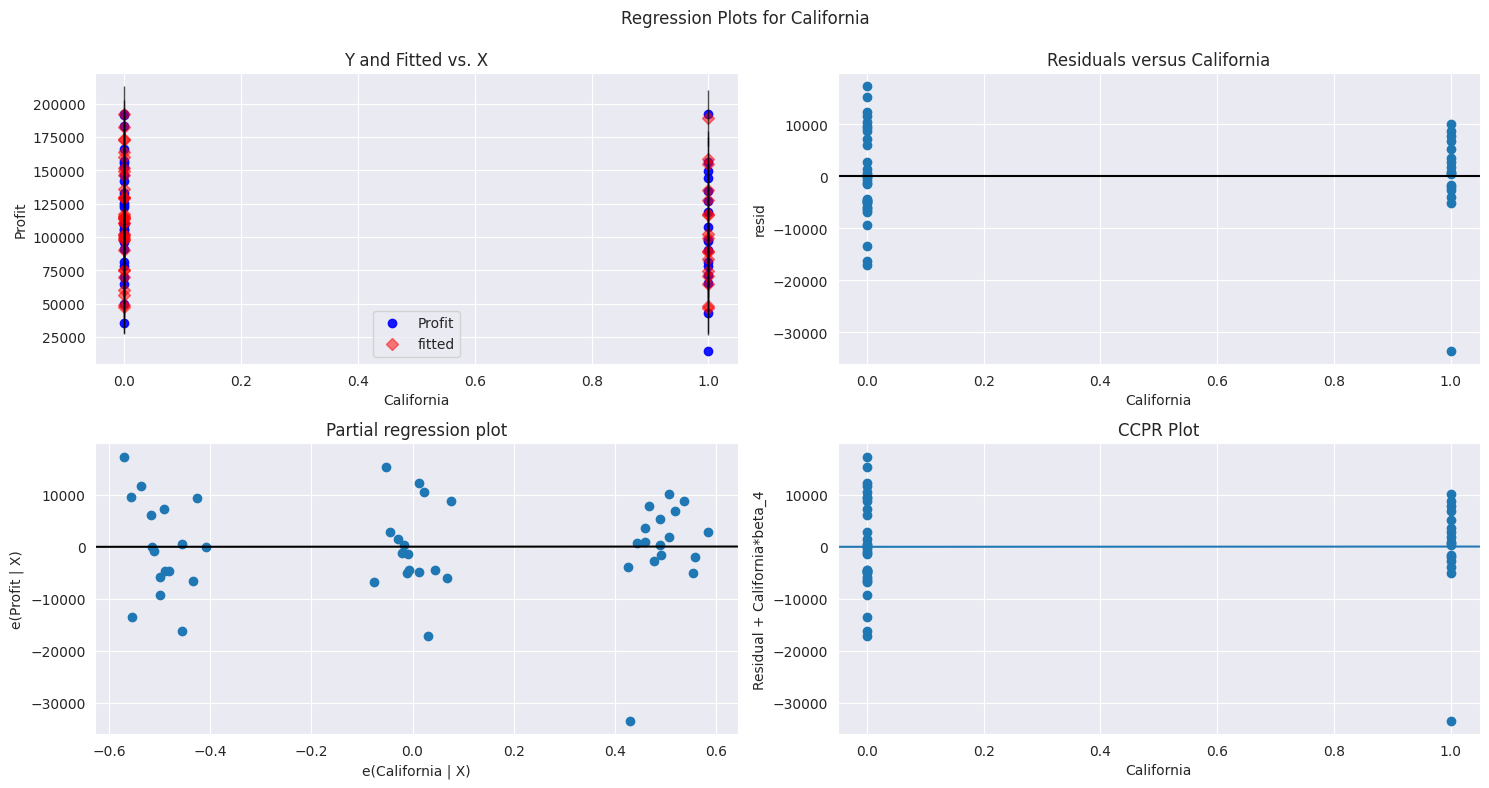

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'California',fig=fig)
plt.show()

eval_env: 1


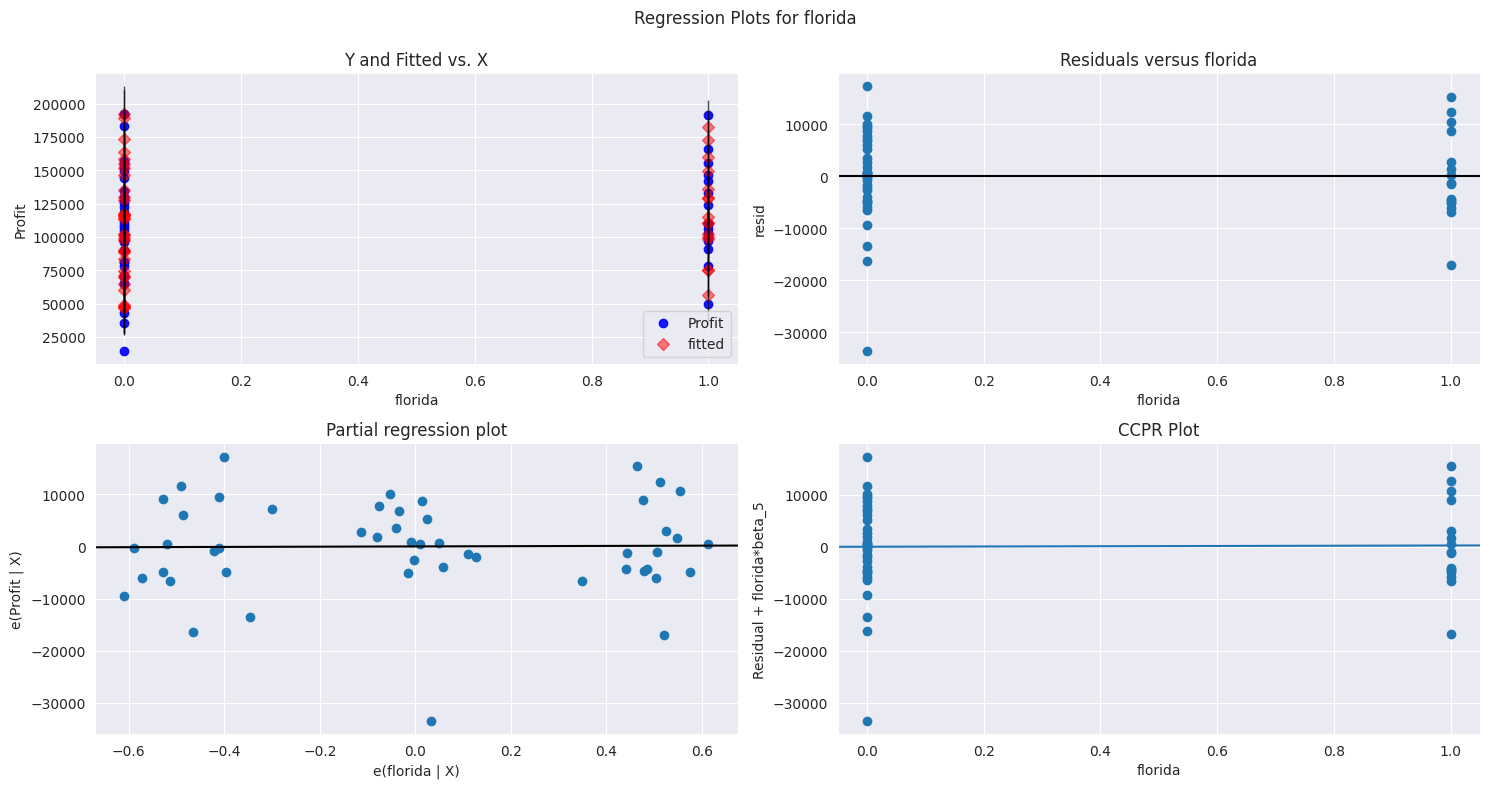

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'florida',fig=fig)
plt.show()

In [40]:
model1_influence=model1.get_influence()
(c, _)=model1_influence.cooks_distance

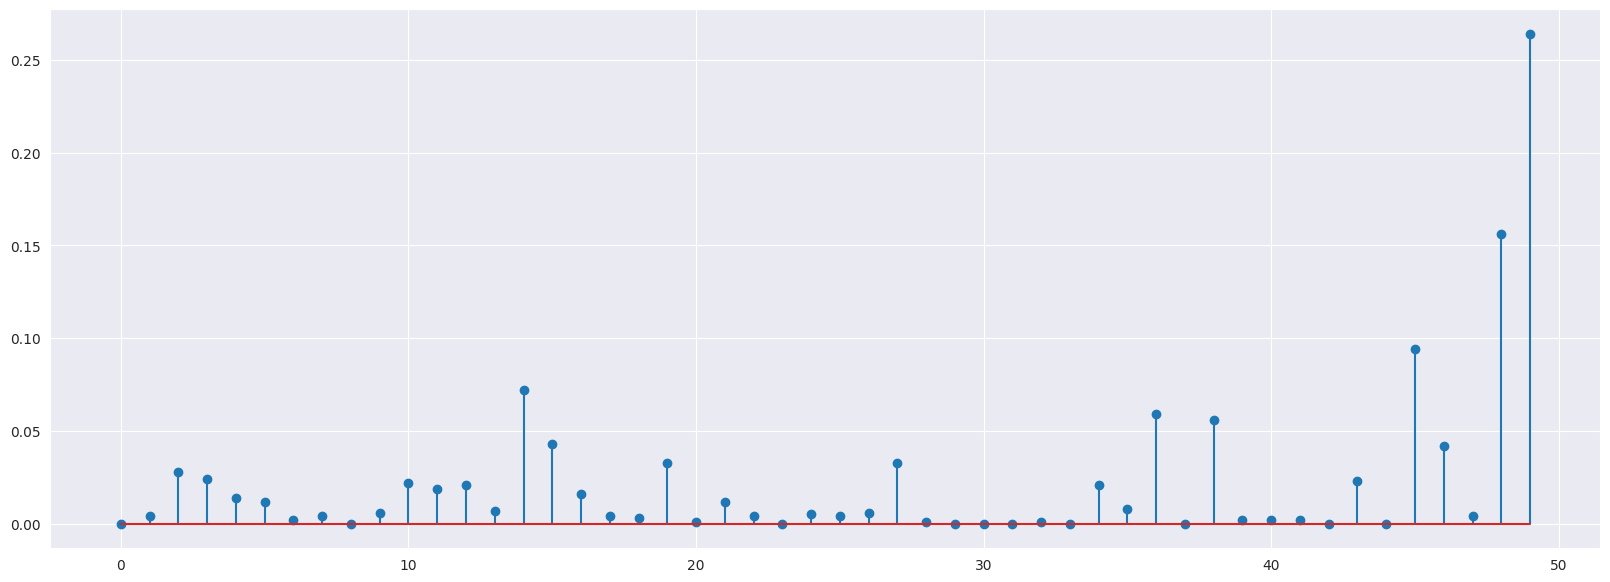

In [41]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(49, 0.2639594358495063)

In [43]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.42000000000000004

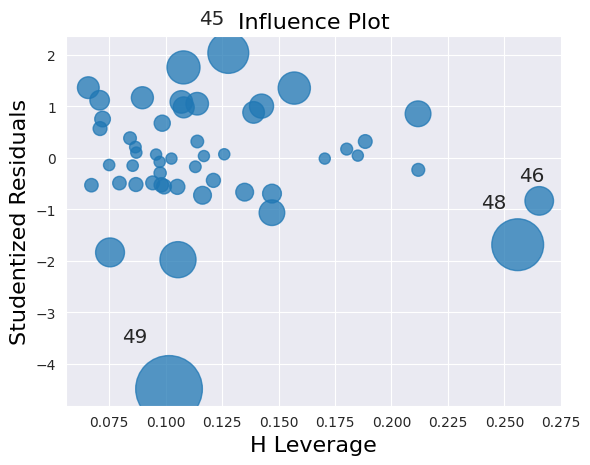

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [45]:
data=data.drop(data.index[49],axis=0).reset_index()

In [46]:
data.head(5)

,index,RD,Admin,Marketing,Profit,California,florida
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1


In [47]:
model2=smf.ols("Profit~RD+Admin+Marketing+California+florida",data=data).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.51e-29
Time:                        14:16:39   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
RD             0.7836      0.039     20.056      0.000       0.705       0.862
Admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing      0.0258      0.014      1.804      0.078      -0.003       0.055
California  1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
florida      389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model2 has the highest rsquared values so it is the best model

In [49]:
model2.fittedvalues

0     190158.286185
1     188917.339413
2     180356.022379
3     171835.121622
4     170611.039177
5     161933.895088
6     158918.600299
7     159073.187404
8     150652.118920
9     155504.737225
10    135154.667794
11    136691.955053
12    129012.886836
13    129003.663840
14    148977.165563
15    145223.746646
16    118657.325455
17    129698.996135
18    128809.413614
19    115762.021211
20    118335.175808
21    117203.470112
22    114924.439923
23    110273.368722
24    113239.472233
25    104538.867178
26    111129.014562
27    114231.691138
28    102600.701013
29    102229.270972
30    100199.636827
31     98246.061777
32    101409.986650
33     98572.020995
34     91728.442639
35     90915.064149
36     76670.864919
37     91870.126205
38     70608.331245
39     86284.488239
40     77761.930431
41     76052.890197
42     73607.243231
43     61687.603280
44     68079.899187
45     49523.991274
46     57967.070071
47     50396.799144
48     50710.448014
dtype: float64

In [50]:
model2.resid

0      2103.543815
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090299
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838789
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325081
37    -1920.986205
38    10620.728755
39    -5278.728239
40      477.979569
41     1745.939803
42    -2108.753231
43     8071.376720
44    -2879.569187
45    15402.088726
46    -8476.320071
47    -7837.069144
48   -15037.038014
dtype: float64

In [51]:
data["predicted"]=model2.fittedvalues
data["Errors"]=model2.resid

In [52]:
data

,index,RD,Admin,Marketing,Profit,California,florida,predicted,Errors
0,0,165349.20,136897.80,471784.10,192261.83,0,0,190158.286185,2103.543815
1,1,162597.70,151377.59,443898.53,191792.06,1,0,188917.339413,2874.720587
2,2,153441.51,101145.55,407934.54,191050.39,0,1,180356.022379,10694.367621
3,3,144372.41,118671.85,383199.62,182901.99,0,0,171835.121622,11066.868378
4,4,142107.34,91391.77,366168.42,166187.94,0,1,170611.039177,-4423.099177
5,5,131876.90,99814.71,362861.36,156991.12,0,0,161933.895088,-4942.775088
6,6,134615.46,147198.87,127716.82,156122.51,1,0,158918.600299,-2796.090299
7,7,130298.13,145530.06,323876.68,155752.60,0,1,159073.187404,-3320.587404
8,8,120542.52,148718.95,311613.29,152211.77,0,0,150652.118920,1559.651080
9,9,123334.88,108679.17,304981.62,149759.96,1,0,155504.737225,-5744.777225


SO MODEL 2 HAVE HIGHER RSQUARED VALUE. THE R&D ARE MOST PROFITABLE

QUESTION 2

TOYOTA COROLLA

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [55]:
df = pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [57]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [58]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [59]:
data=pd.DataFrame({'Price':df['Price'], 'Age':df['Age_08_04'], 'KM':df['KM'],'HP':df['HP'], 'cc':df['cc'], 'Doors':df['Doors'], 'Gears':df['Gears'], 'QTax':df['Quarterly_Tax'], 'Weight':df['Weight']})
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [60]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTax', 'Weight'], dtype='object')

In [61]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [62]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QTax      int64
Weight    int64
dtype: object

In [63]:
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QTax      0
Weight    0
dtype: int64

In [64]:
data.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [65]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [66]:
data.drop_duplicates(inplace = True)

In [67]:
data=data.reset_index()

In [68]:
data

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [69]:
data=data.drop('index',axis=1)

In [70]:
data

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


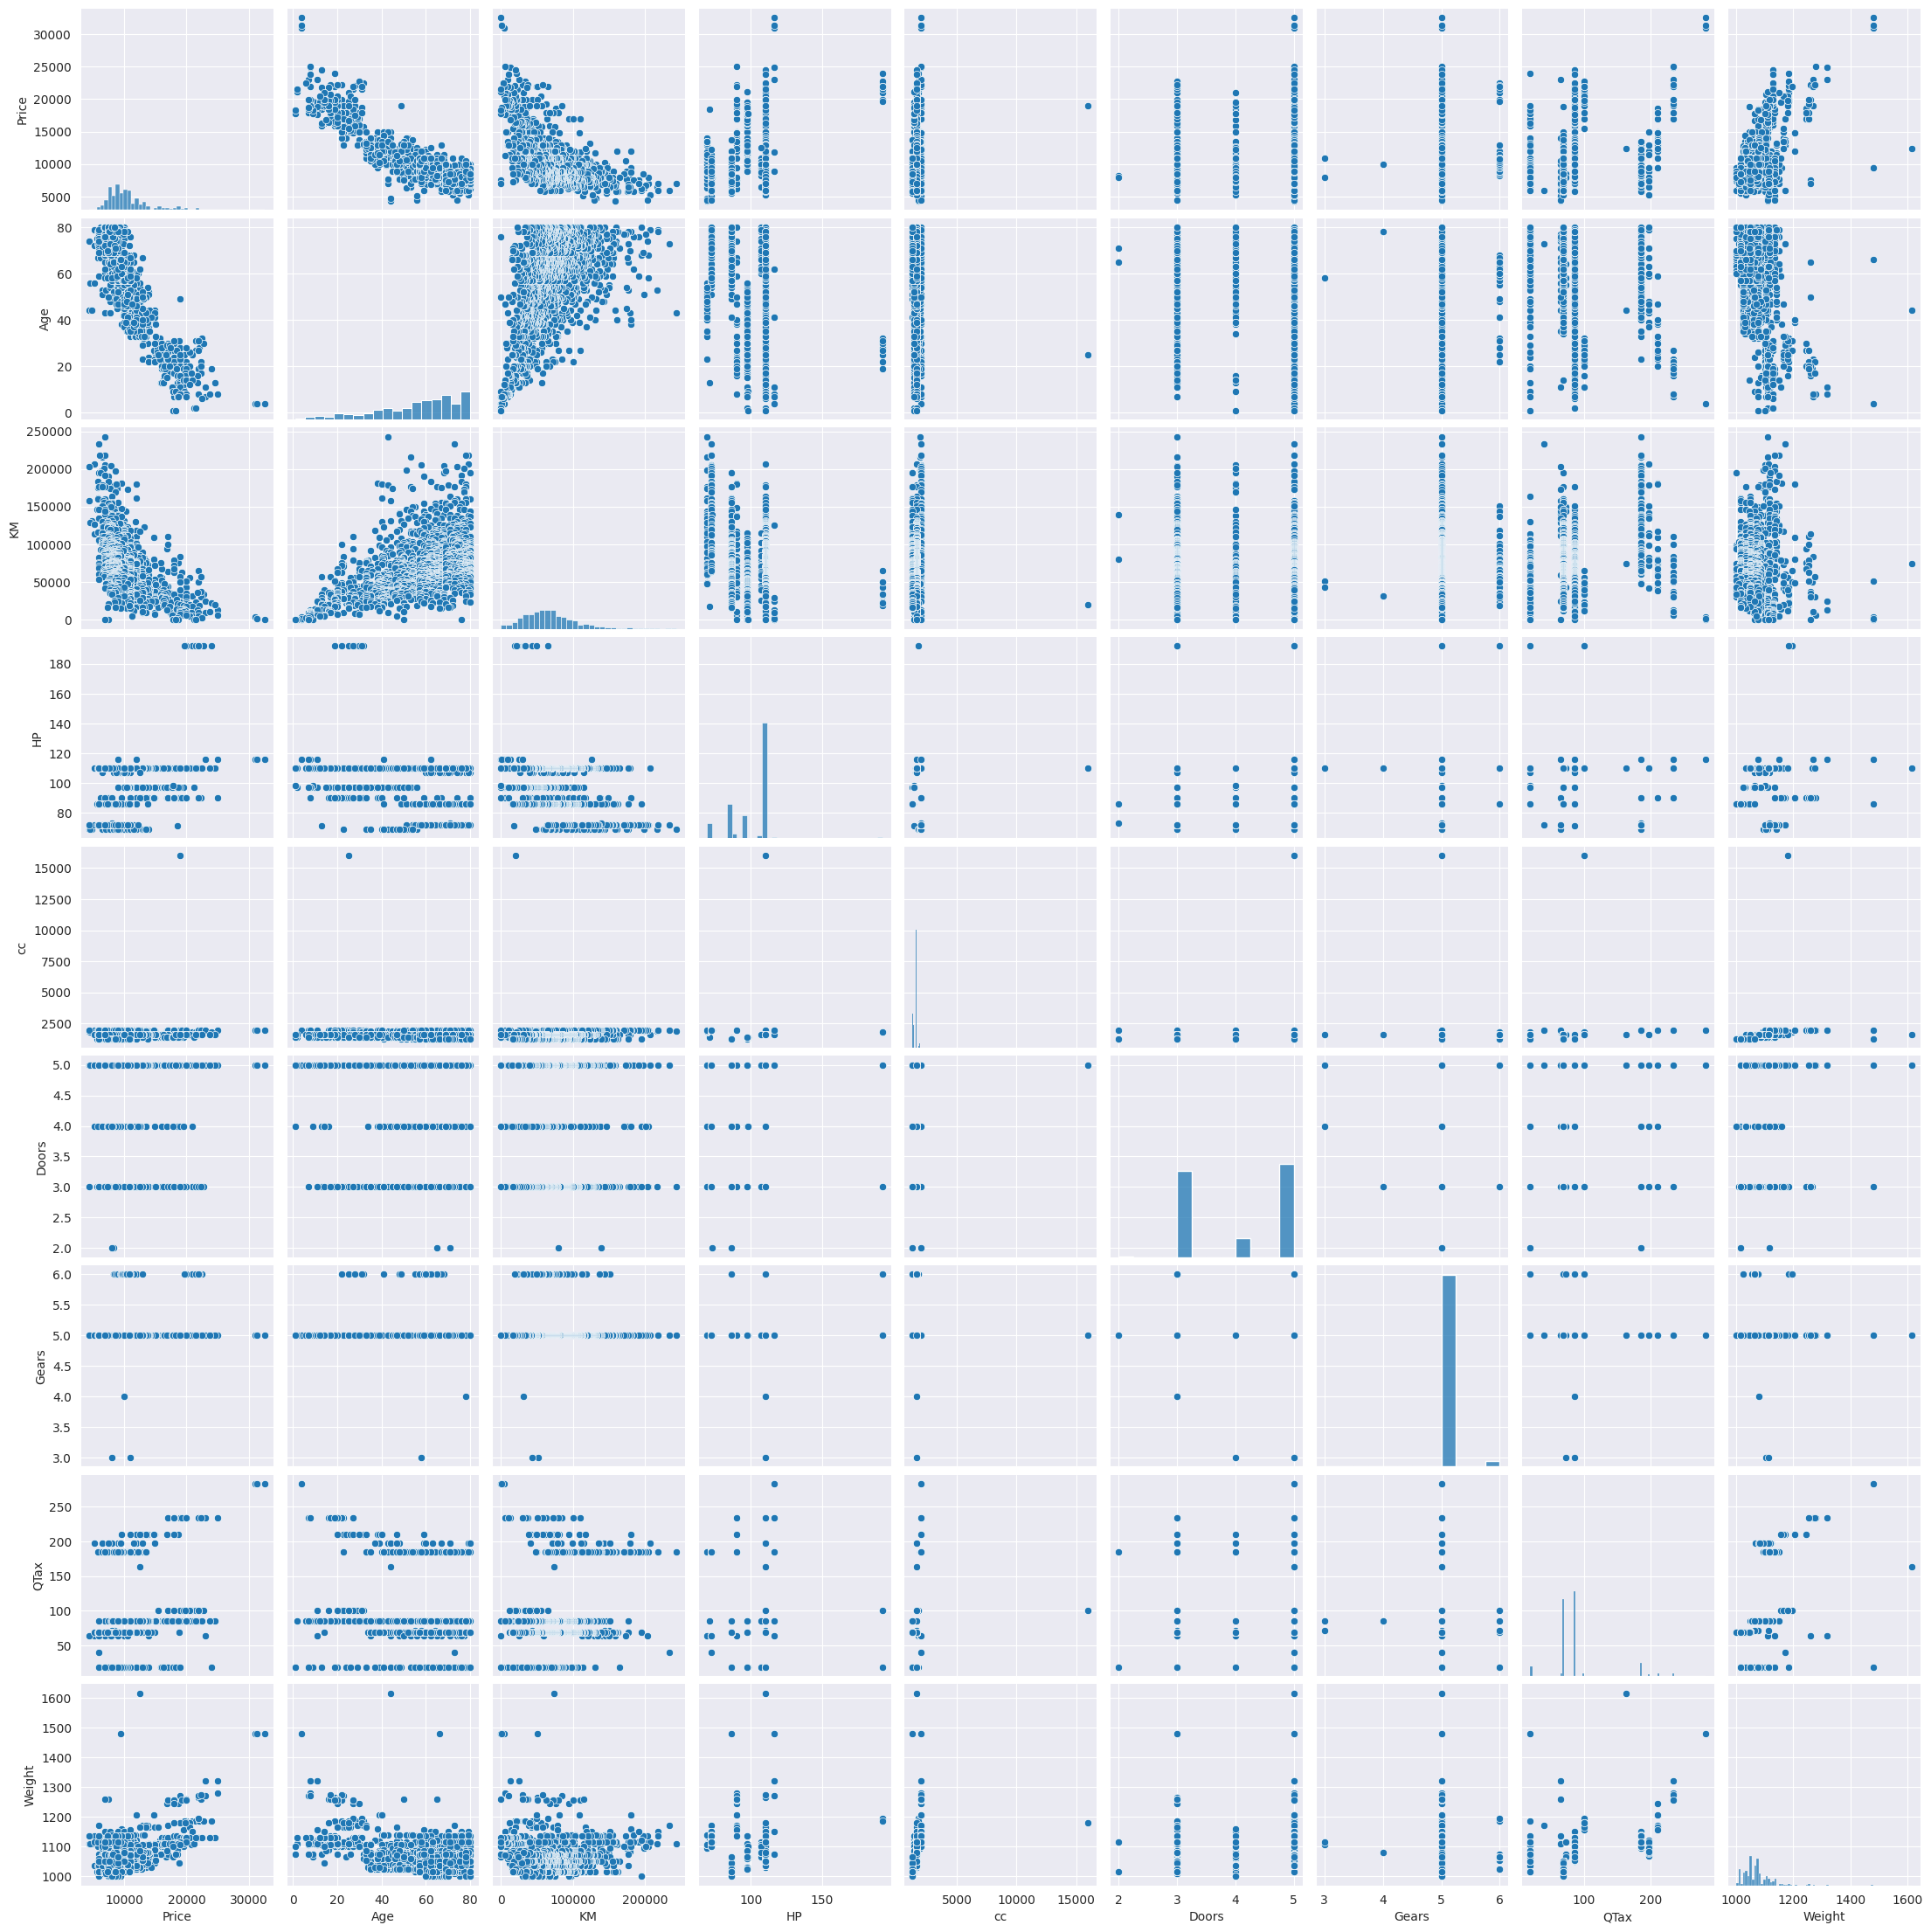

In [71]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [72]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [73]:
data=data.drop('Gears',axis = 1)

In [74]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+QTax+Weight',data=data).fit()

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:17:12   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
cc            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
QTax           4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
model.fittedvalues

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

In [77]:
model.params

Intercept   -2636.384329
Age          -121.847802
KM             -0.020454
HP             33.647877
cc             -0.122677
Doors         -23.980630
QTax            4.035301
Weight         16.884429
dtype: float64

In [78]:
model.pvalues

Intercept     1.313394e-02
Age          6.480986e-288
KM            4.646226e-55
HP            5.622551e-33
cc            1.745423e-01
Doors         5.425721e-01
QTax          2.158809e-03
Weight        1.297391e-51
dtype: float64

In [79]:
model=smf.ols('Price~cc',data= data).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.29e-06
Time:                        14:17:13   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
model = smf.ols('Price~Doors' , data=data).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.40e-12
Time:                        14:17:13   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
data=data.drop('cc',axis=1)
data

,Price,Age,KM,HP,Doors,QTax,Weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,69,1025
1431,10845,72,19000,86,3,69,1015
1432,8500,71,17016,86,3,69,1015
1433,7250,70,16916,86,3,69,1015


In [84]:
model= smf.ols('Price~Age+KM+HP+Doors+QTax+Weight',data=data).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1480.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:17:13   Log-Likelihood:                -12372.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2518.7574   1058.453     -2.380      0.017   -4595.046    -442.468
Age         -121.8917      2.622    -46.483      0.000    -127.036    -116.748
KM            -0.0206      0.001    -16.455      0.000      -0.023      -0.018
HP            33.3055      2.731     12.194      0.000      27.947      38.663
Doors        -23.2523     39.380     -0.590      0.555    -100.502      53.997
QTax           3.8184      1.304      2.929      0.003       1.261       6.376
Weight        16.6515      1.059     15.724      0.000      14.574      18.729
==============================================================================
Omnibus:                      145.933   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.411
Skew:                          -0.206   Prob(JB):                    2.78e-204
Kurtosis:                       6.938   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
vif1=smf.ols('Age~KM+HP+Doors+QTax+Weight',data=data).fit().rsquared

In [87]:
vif_age=1/(1-vif1)
vif_age

1.8754157698689948

In [88]:
vif2=smf.ols('KM~Age+HP+Doors+QTax+Weight',data=data).fit().rsquared

In [89]:
vif_km=1/(1-vif2)
vif_km

1.738917312460494

In [90]:
vif3=smf.ols('HP~Age+KM+Doors+QTax+Weight',data=data).fit().rsquared
vif_hp=1/(1-vif3)
vif_hp

1.325245856832752

In [91]:
vif4=smf.ols('Doors~Age+KM+HP+QTax+Weight',data=data).fit().rsquared
vif_doors=1/(1-vif4)
vif_doors

1.1139391313630986

In [92]:
vif5=smf.ols('QTax~Age+KM+HP+Doors+Weight',data=data).fit().rsquared
vif_QTax=1/(1-vif5)
vif_QTax

2.2569972489856003

In [93]:
vif6=smf.ols('Weight~Age+KM+HP+Doors+QTax',data=data).fit().rsquared
vif_Weight=1/(1-vif6)
vif_Weight

2.4234226266161705

In [94]:
d1={"variables":['Age','HP','KM','Doors','QTax','Weight'],"vif":[1.87,1.73,1.32,1.11,2.25,2.42]}

In [95]:
viftable=pd.DataFrame(d1)
viftable

,variables,vif
0,Age,1.87
1,HP,1.73
2,KM,1.32
3,Doors,1.11
4,QTax,2.25
5,Weight,2.42


In [96]:
model.resid

0      -3339.719690
1      -2555.830091
2      -2876.350450
3      -1503.183434
4      -2494.317424
           ...     
1430   -1273.854299
1431    2571.571462
1432      63.862906
1433   -1310.086141
1434   -3437.132174
Length: 1435, dtype: float64

TypeError: ignored

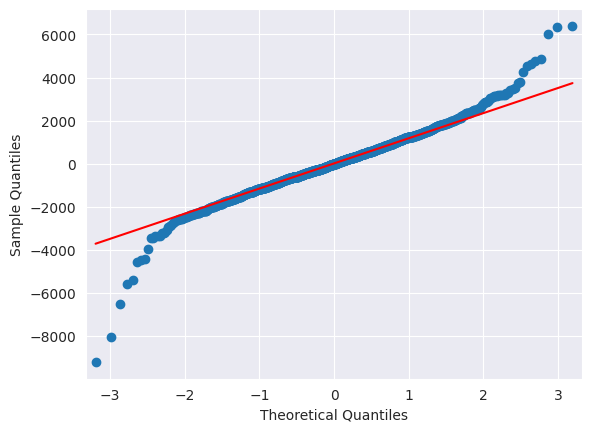

In [141]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals ")
plt.show()


<Axes: >

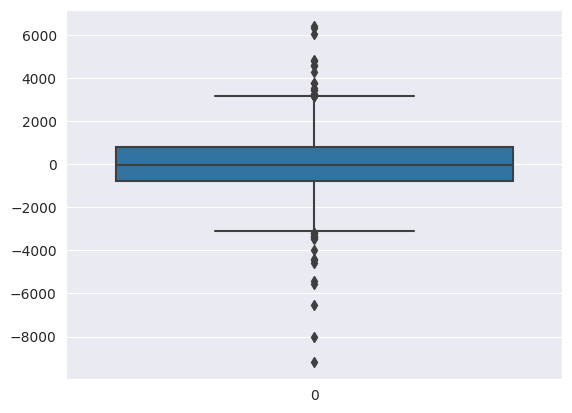

In [98]:
sns.boxplot(model.resid)

In [99]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

0       1.826821
1       1.667423
2       1.822829
3       1.711417
4       1.649058
          ...   
1430   -0.581312
1431   -0.730718
1432   -0.682140
1433   -0.645134
1434   -0.099654
Length: 1435, dtype: float64
0      -2.486321
1      -1.902739
2      -2.141356
3      -1.119075
4      -1.856944
          ...   
1430   -0.948346
1431    1.914458
1432    0.047544
1433   -0.975320
1434   -2.558842
Length: 1435, dtype: float64


TypeError: ignored

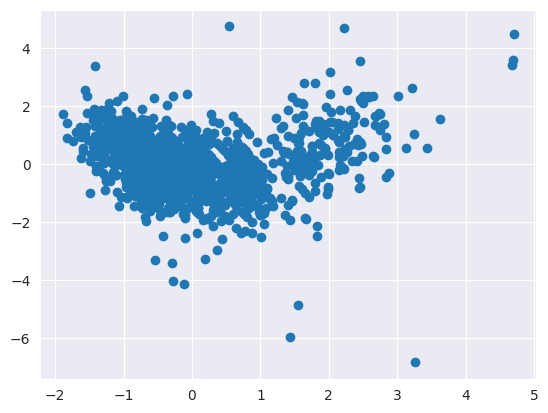

In [140]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fittedvalues')
plt.ylabel('Standardized residuals')
plt.show()

eval_env: 1


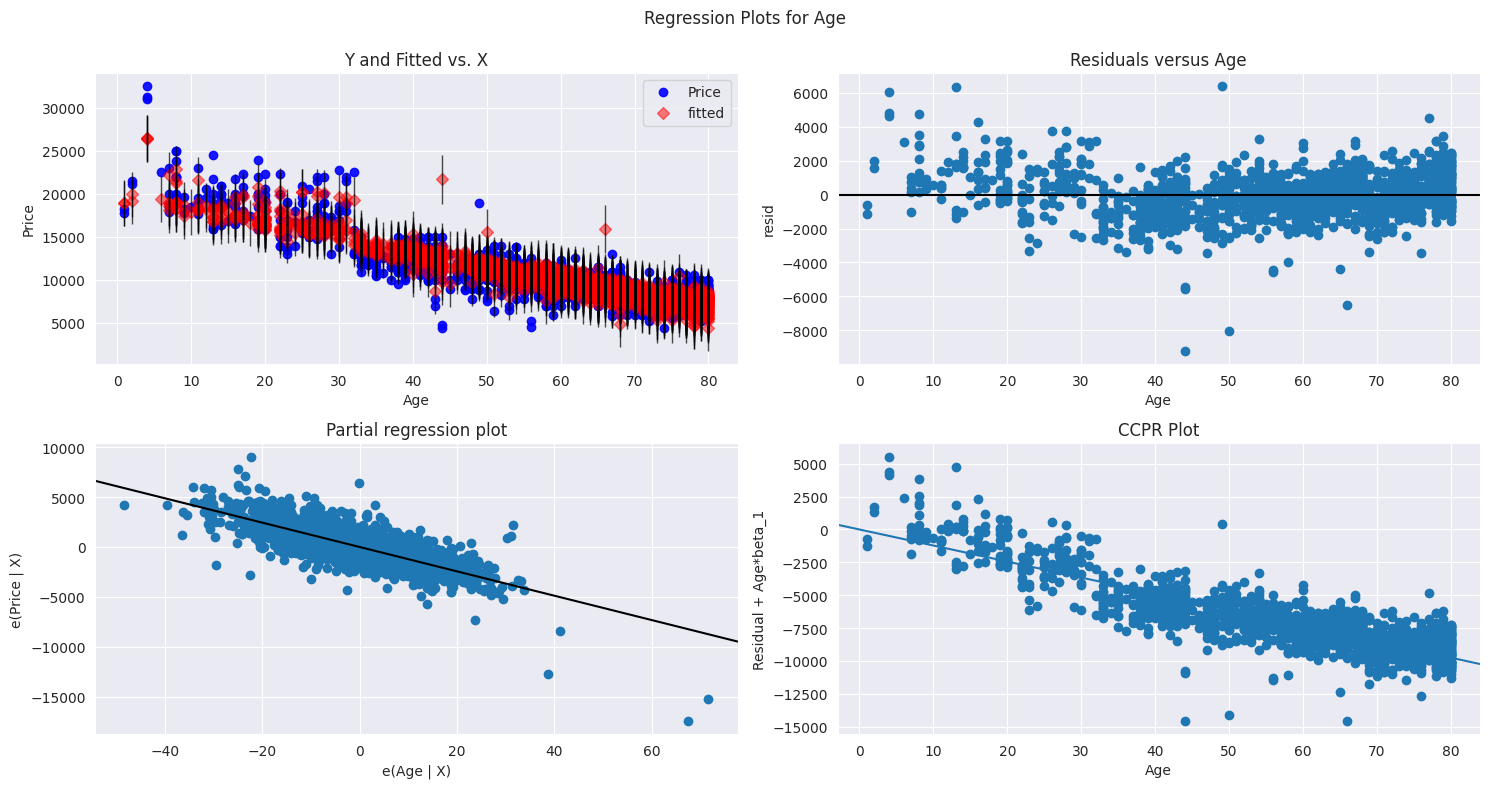

In [104]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

eval_env: 1


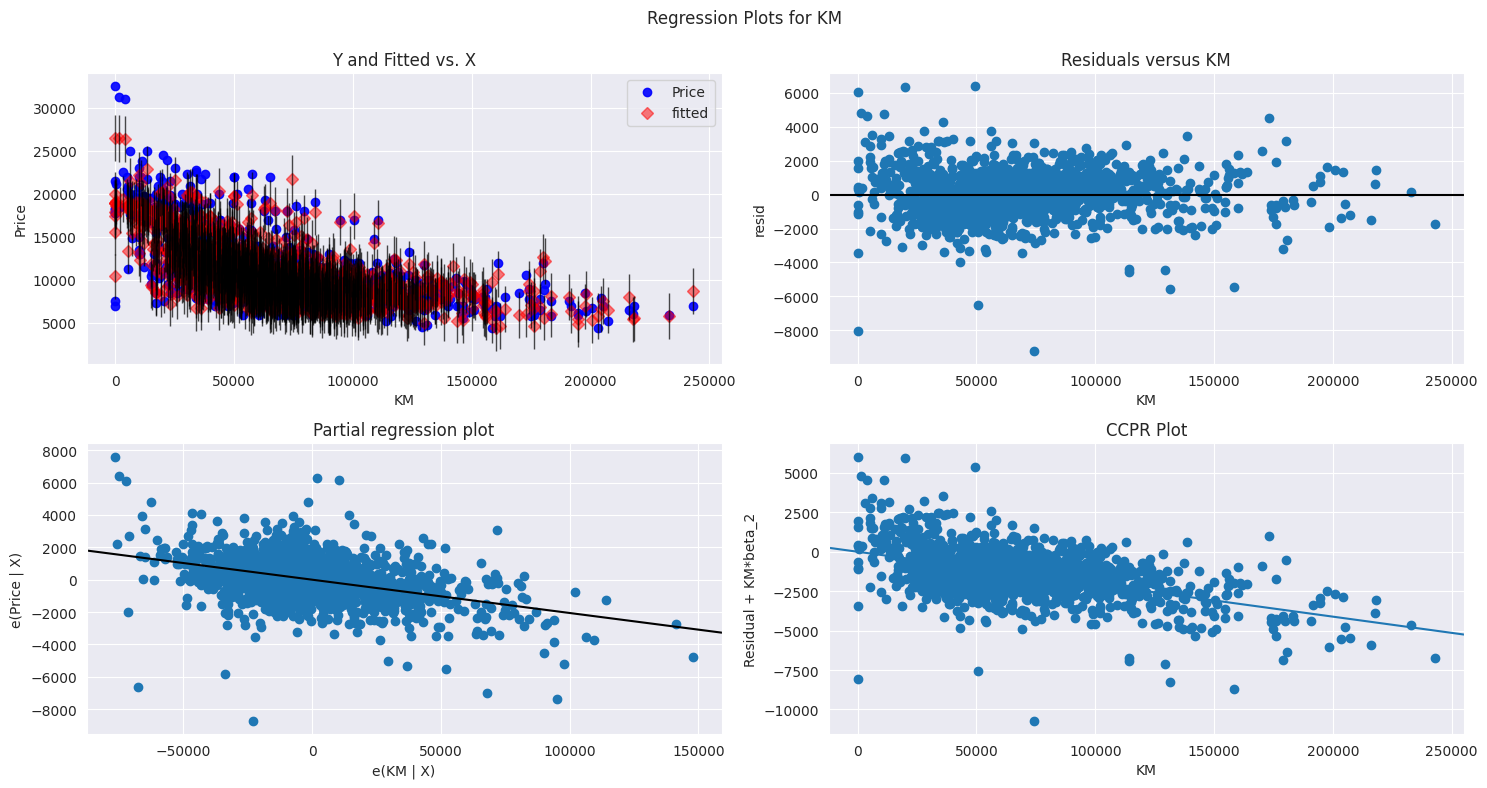

In [105]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


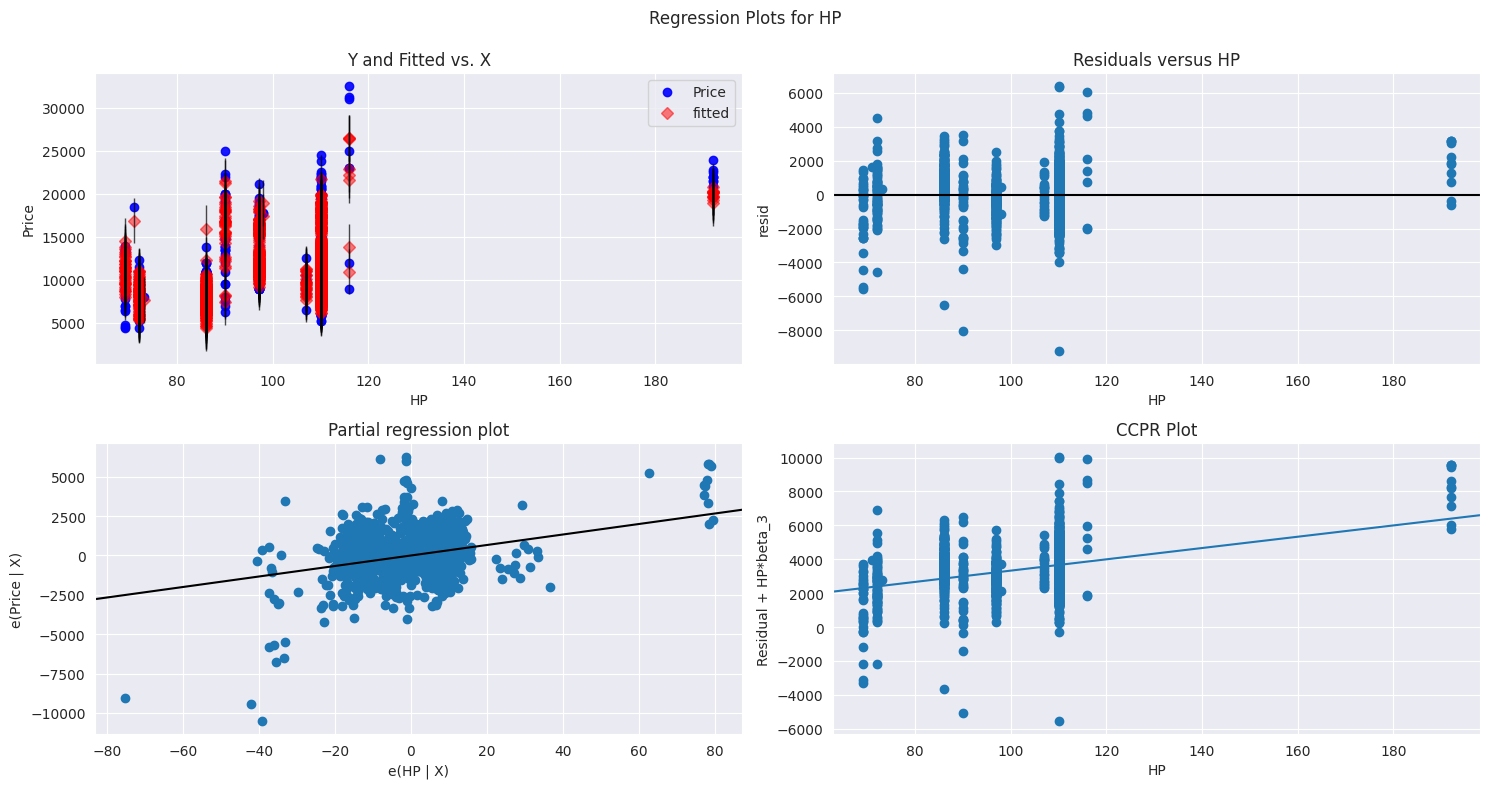

In [107]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


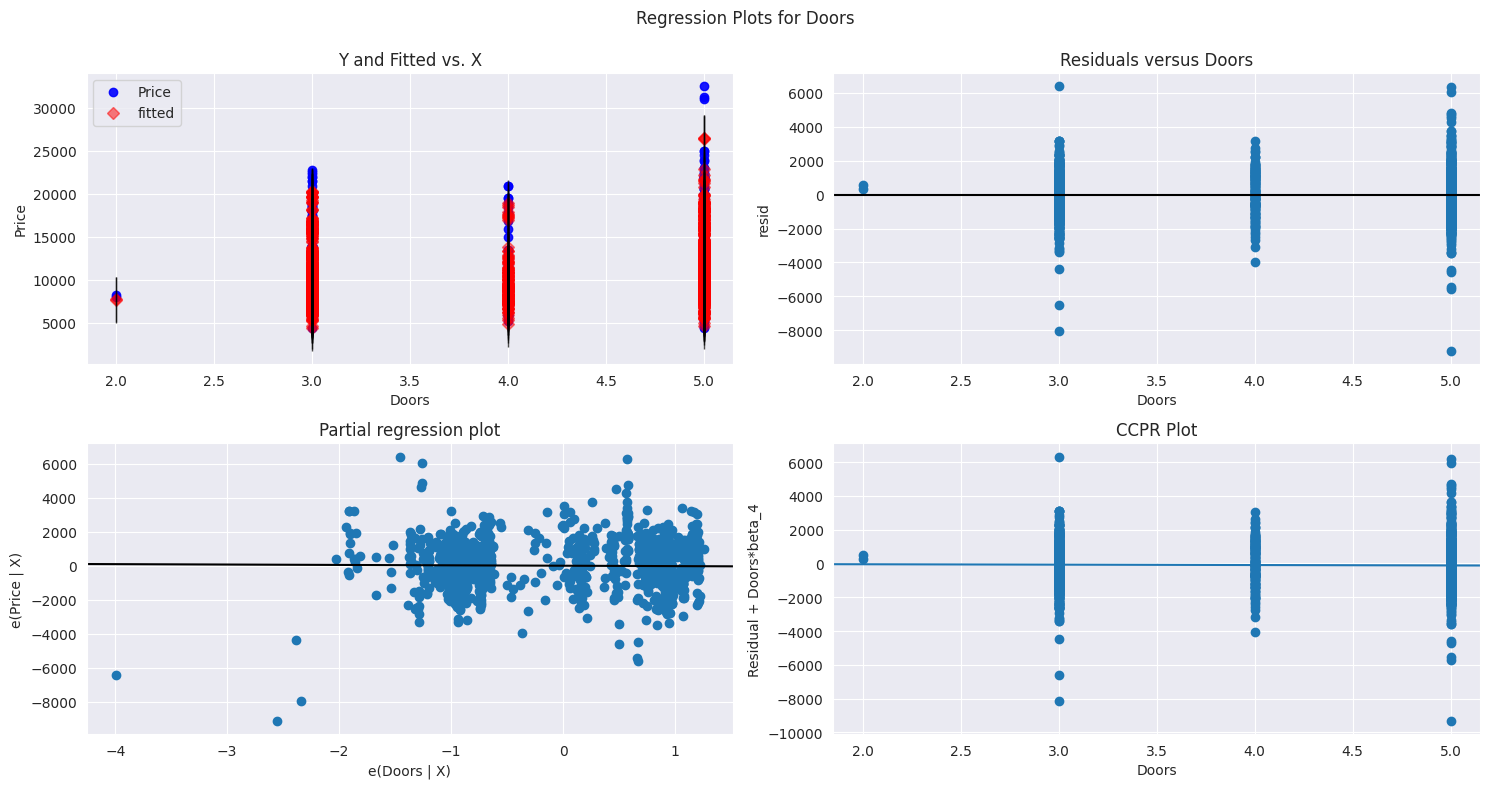

In [108]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


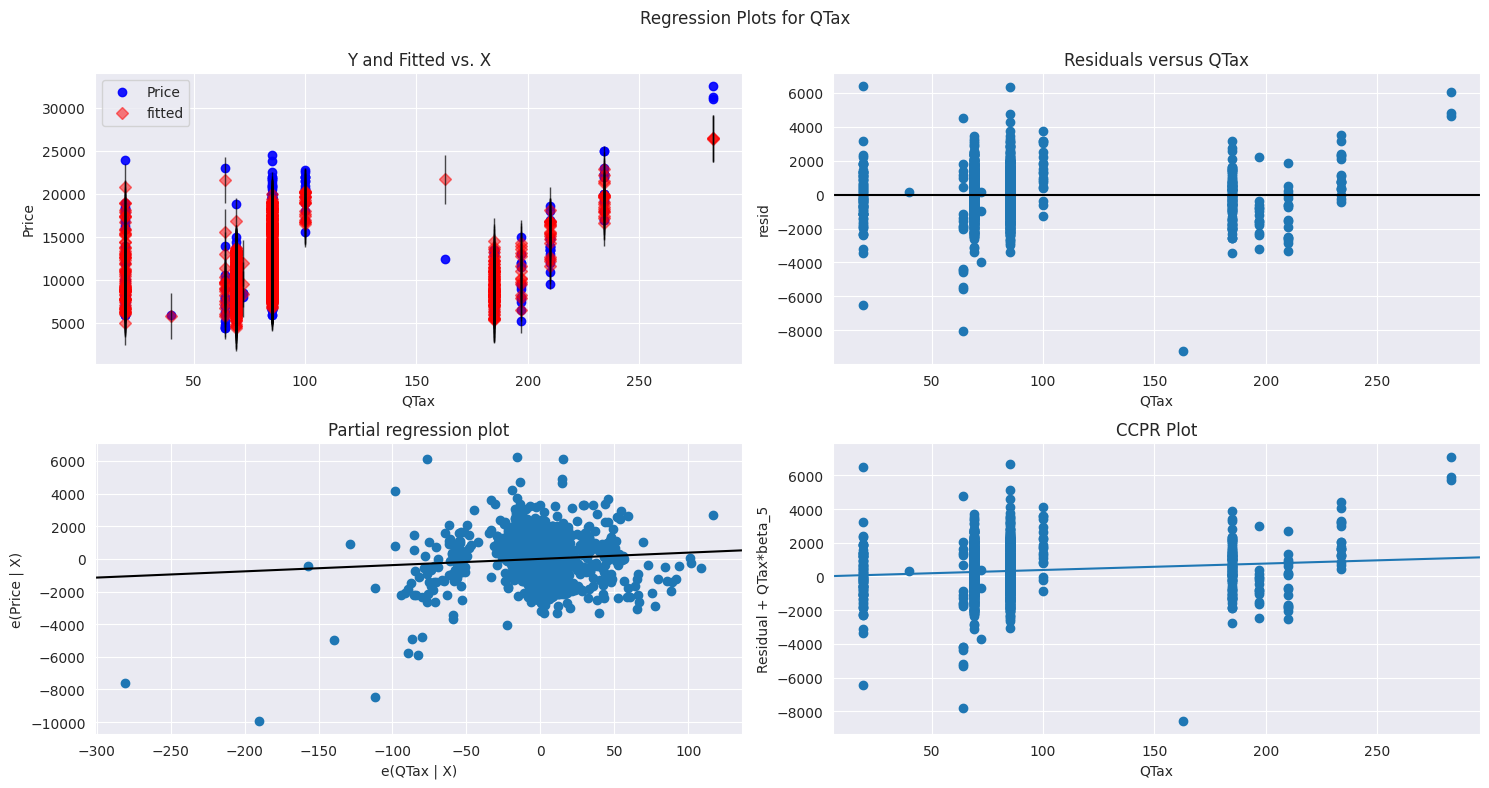

In [109]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QTax",fig=fig)
plt.show()

eval_env: 1


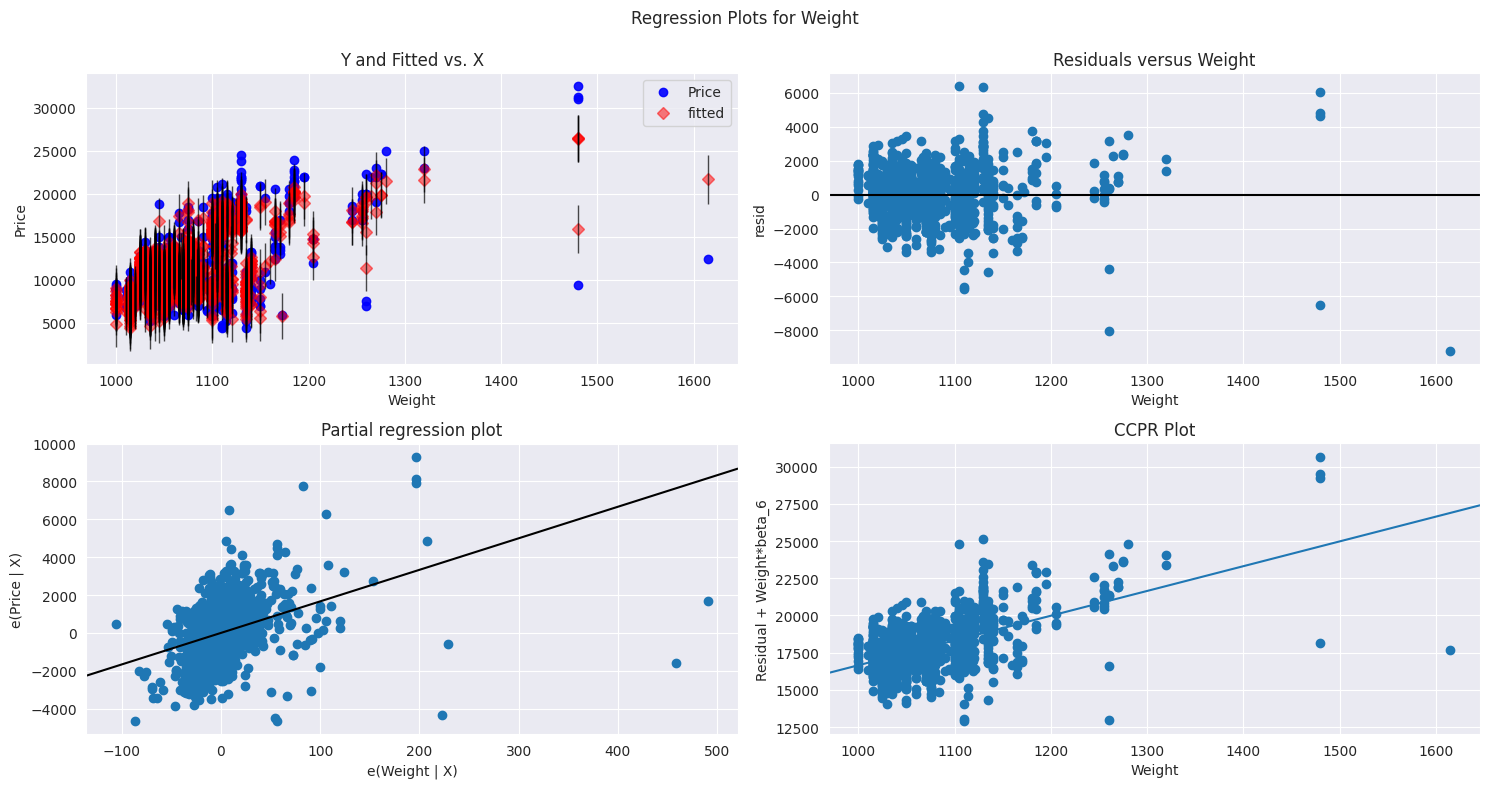

In [110]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [111]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

TypeError: ignored

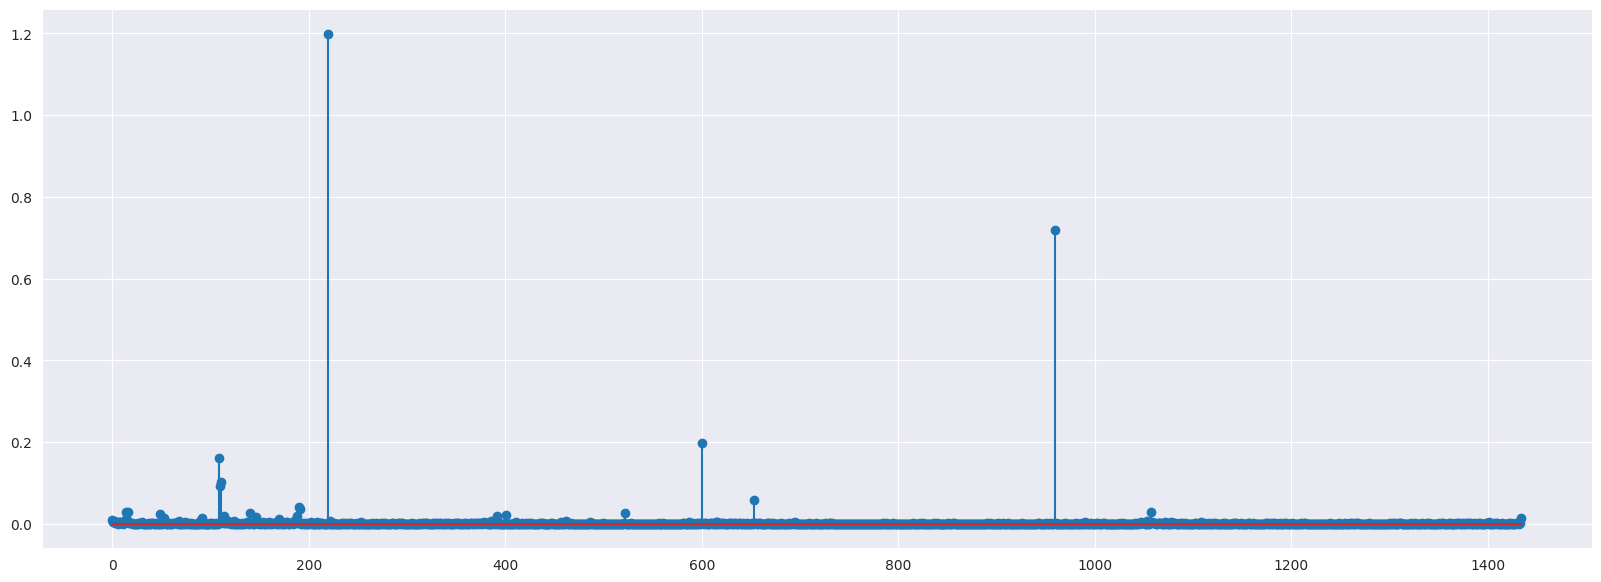

In [114]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel('Cooks Distance')
plt.show()

In [115]:
(np.argmax(c),np.max(c))

(220, 1.1987544668624894)

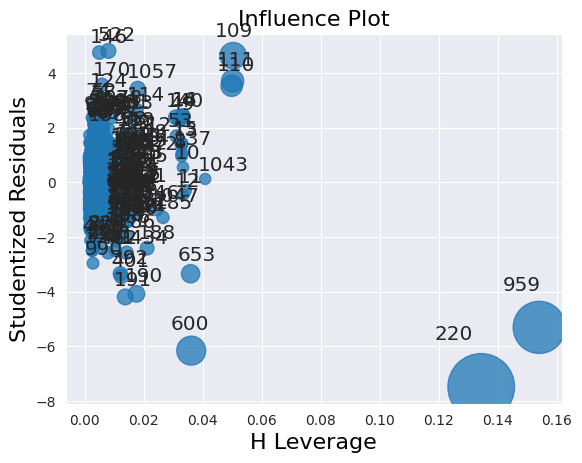

In [116]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [117]:
data.shape

(1435, 7)

In [118]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.016724738675958188

In [119]:
data=data.drop(data.index[220],axis=0).reset_index()

In [120]:
data.iloc[215:225,:]

,index,Price,Age,KM,HP,Doors,QTax,Weight
215,215,13500,33,75699,69,3,185,1105
216,216,10950,41,75697,97,3,69,1025
217,217,10950,44,74846,97,3,69,1025
218,218,12950,38,74319,110,5,85,1075
219,219,11950,43,74285,110,5,85,1075
220,221,11950,40,73042,110,5,85,1075
221,222,14950,44,71793,110,4,197,1067
222,223,12450,35,71200,110,5,85,1075
223,224,12950,38,67805,110,5,85,1075
224,225,11950,35,65988,110,3,69,1040


In [121]:
data=data.drop("index",axis=1)

In [122]:
data.iloc[215:225,:]

,Price,Age,KM,HP,Doors,QTax,Weight
215,13500,33,75699,69,3,185,1105
216,10950,41,75697,97,3,69,1025
217,10950,44,74846,97,3,69,1025
218,12950,38,74319,110,5,85,1075
219,11950,43,74285,110,5,85,1075
220,11950,40,73042,110,5,85,1075
221,14950,44,71793,110,4,197,1067
222,12450,35,71200,110,5,85,1075
223,12950,38,67805,110,5,85,1075
224,11950,35,65988,110,3,69,1040


In [124]:
model2 = smf.ols('Price~Age+KM+HP+Doors+QTax+Weight' , data=data).fit()

In [125]:
model2.rsquared

0.8666728532499485

In [126]:
data.head

<bound method NDFrame.head of       Price  Age     KM   HP  Doors  QTax  Weight
0     13500   23  46986   90      3   210    1165
1     13750   23  72937   90      3   210    1165
2     13950   24  41711   90      3   210    1165
3     14950   26  48000   90      3   210    1165
4     13750   30  38500   90      3   210    1170
...     ...  ...    ...  ...    ...   ...     ...
1429   7500   69  20544   86      3    69    1025
1430  10845   72  19000   86      3    69    1015
1431   8500   71  17016   86      3    69    1015
1432   7250   70  16916   86      3    69    1015
1433   6950   76      1  110      5    19    1114

[1434 rows x 7 columns]>

In [127]:
model2_influence=model2.get_influence()
(c1, _)=model2_influence.cooks_distance

TypeError: ignored

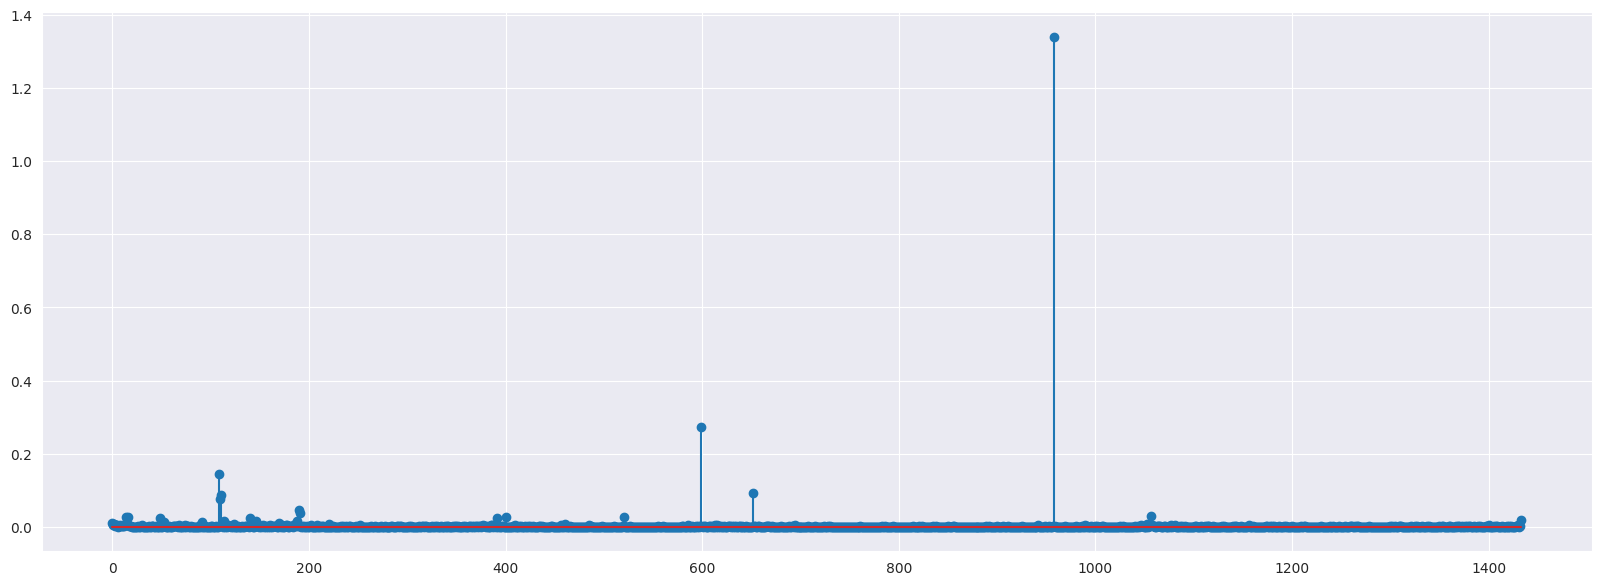

In [128]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c1,3))
plt.xlabel("Row index")
plt.ylabel("Cooks distance")

In [129]:
(np.argmax(c1),np.max(c1))

(958, 1.3402996914230358)

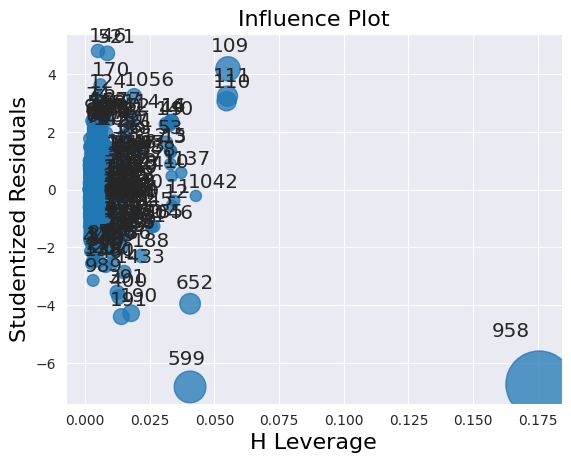

In [130]:
influence_plot(model2)
plt.show()

In [131]:
data=data.drop(data.index[958],axis=0).reset_index()

In [132]:
data=data.drop("index",axis=1)
data.iloc[953:958,:]

,Price,Age,KM,HP,Doors,QTax,Weight
953,8750,58,51712,110,3,69,1050
954,10950,58,51421,110,5,85,1105
955,8950,61,51235,86,4,69,1000
956,8950,65,51000,86,3,69,1015
957,8895,61,50925,110,5,85,1070


In [133]:
model3=smf.ols("Price~Age+KM+HP+Doors+QTax+Weight",data=data).fit()

In [134]:
model3.rsquared

0.8707773883293434

TypeError: ignored

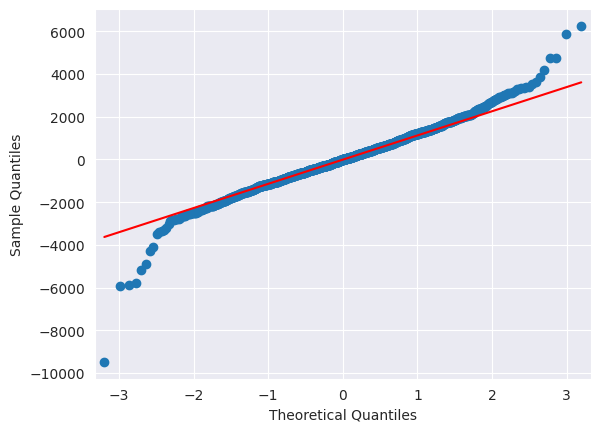

In [135]:
sm.qqplot(model3.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

In [136]:
Predicted=model3.fittedvalues

In [137]:
Errors=model3.resid

In [138]:
data['Predicted'] = Predicted
data['Errors'] = Errors

In [139]:
data

,Price,Age,KM,HP,Doors,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,3,210,1165,16807.692483,-3307.692483
1,13750,23,72937,90,3,210,1165,16260.176738,-2510.176738
2,13950,24,41711,90,3,210,1165,16802.826307,-2852.826307
3,14950,26,48000,90,3,210,1165,16437.823729,-1487.823729
4,13750,30,38500,90,3,210,1170,16288.791032,-2538.791032
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,3,69,1025,8810.603810,-1310.603810
1429,10845,72,19000,86,3,69,1015,8264.364896,2580.635104
1430,8500,71,17016,86,3,69,1015,8422.381886,77.618114
1431,7250,70,16916,86,3,69,1015,8540.650133,-1290.650133


model3 has the highest rsquared values so it is the best model